In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Calculating p300 mean thermal velocity
m, um, nm = 1, 1e-6, 1e-9
kg = 1
s, ms, us, ns = 1, 1e-3, 1e-6, 1e-9
K = 1
J = 1 * kg * m ** 2 / s ** 2
Da = 1.66 * 10 ** -27 * kg
kDa = 1e3 * Da

m = 300 * kDa
T = 310 * K # body temp is around 37 C
kB = 1.38 * 10 ** -23 * J / K

v_th = np.sqrt(8 * kB * T / (np.pi * m)) # https://en.wikipedia.org/wiki/Special:BookSources/978-1-107-02737-4
print(v_th, "m/s")

4.677090526457534 m/s


In [3]:
dt = 1e-10 * s
def free_particle_displacement(trials, C_HDAC, P_deacetylation_if_HDAC):
    P_deacetylation = C_HDAC * P_deacetylation_if_HDAC
    print(C_HDAC, P_deacetylation_if_HDAC, P_deacetylation)
    displacements = []
    times = []
    for i in range(trials):
        tf = np.array([0, 0, 0]).astype(float)
        deacetylated = False
        t = 0
        while not deacetylated:
            deacetylated = np.random.choice([True, False], p=[P_deacetylation, 1 - P_deacetylation])
            if deacetylated:
                displacements.append(np.linalg.norm(tf))
                times.append(t)
            else:
                theta = np.random.uniform(0, 2 * np.pi)
                phi = np.random.uniform(0, np.pi)
                v = v_th * np.array([np.sin(phi) * np.cos(theta), np.sin(phi) * np.sin(theta), np.cos(phi)])
                tf += v * dt
                t += dt
    return displacements, times

In [4]:
trials = 1000
C_HDAC = 0.1 # prob of finding an HDAC in a given voxel
P_deacetylation_if_HDAC = 0.2 # prob of acetylation if HDAC is present
multiples = [0.5, 1, 2, 4]
outputs = [free_particle_displacement(trials, C_HDAC, mult * P_deacetylation_if_HDAC) for mult in multiples]

0.1 0.1 0.010000000000000002
0.1 0.2 0.020000000000000004
0.1 0.4 0.04000000000000001
0.1 0.8 0.08000000000000002


Text(0.5, 9.444444444444438, 'Displacement (m)')

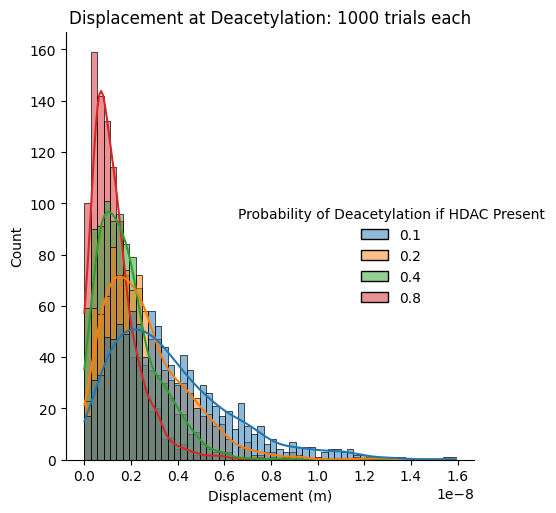

In [5]:
displacements = [output[0] for output in outputs]
g = sns.displot(displacements, kde=True)
plt.title(f"Displacement at Deacetylation: {trials} trials each")
g._legend.set_title("Probability of Deacetylation if HDAC Present")
for t in g._legend.texts:
    t.set_text(f"{P_deacetylation_if_HDAC * multiples[int(t.get_text())]}")
plt.xlabel("Displacement (m)")

Text(0.5, 9.444444444444438, 'Time (s)')

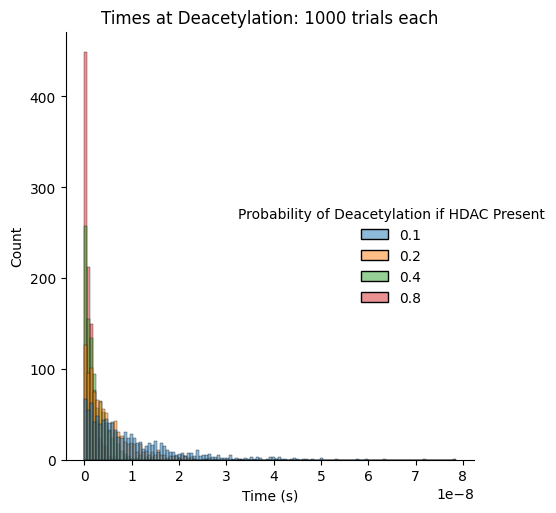

In [6]:
times = [output[1] for output in outputs]
g = sns.displot(times)
plt.title(f"Times at Deacetylation: {trials} trials each")
g._legend.set_title("Probability of Deacetylation if HDAC Present")
for t in g._legend.texts:
    t.set_text(f"{P_deacetylation_if_HDAC * multiples[int(t.get_text())]}")
plt.xlabel("Time (s)")

In [7]:
# Calculating tf mean velocity
m, um, nm = 1, 1e-6, 1e-9
kg = 1
s, ms, us, ns = 1, 1e-3, 1e-6, 1e-9
K = 1
J = 1 * kg * m ** 2 / s ** 2
Da = 1.66 * 10 ** -27 * kg
kDa = 1e3 * Da

m = 300 * kDa
T = 310 * K # body temp is around 37 C
kB = 1.38 * 10 ** -23 * J / K

v_th = np.sqrt(8 * kB * T / (np.pi * m)) # https://en.wikipedia.org/wiki/Special:BookSources/978-1-107-02737-4
print(v_th, "m/s")

4.677090526457534 m/s


In [8]:
def free_particle_displacement(trials, C_HDAC, P_deacetylation_if_HDAC, dt=1e-10 * s):
    P_deacetylation = C_HDAC * P_deacetylation_if_HDAC
    P_deacetylation_per_step = 1 - np.exp(-P_deacetylation * dt) # CDF of an exponential distribution at t=dt
    print(P_deacetylation_per_step)
    displacements = []
    times = []
    for i in range(trials):
        tf = np.array([0, 0, 0]).astype(float)
        deacetylated = False
        t = 0
        while not deacetylated:
            deacetylated = np.random.choice([True, False], p=[P_deacetylation_per_step, 1 - P_deacetylation_per_step])
            if deacetylated:
                displacements.append(np.linalg.norm(tf))
                times.append(t)
            else:
                theta = np.random.uniform(0, 2 * np.pi)
                phi = np.random.uniform(0, np.pi)
                v = v_th * np.array([np.sin(phi) * np.cos(theta), np.sin(phi) * np.sin(theta), np.cos(phi)])
                tf += v * dt
                t += dt
    return displacements, times, P_deacetylation_per_step

In [9]:
trials = 1000
dt = 0.005 * s
nucleolar_radius = 1 / 2 * um
nucleolar_volume = 4 / 3 * np.pi * nucleolar_radius ** 3
num_HDAC = 2000
HDAC_reach = 1 * nm
HDAC_reach_vol = 4 / 3 * np.pi * HDAC_reach ** 3
C_HDAC = lambda n: n * HDAC_reach_vol / nucleolar_volume # prob of finding an HDAC in a given voxel: fraction of the nucleus that is HDAC accessible
P_deacetylation_if_HDAC = 0.2 / us # prob of deacetylation per unit time if HDAC is present
multiples = [0.5, 1, 2, 4]
outputs = [free_particle_displacement(trials, C_HDAC(mult * num_HDAC), P_deacetylation_if_HDAC, dt=dt) for mult in multiples]
P_deacetylation_per_step = [output[2] for output in outputs]

0.007968085162939342
0.015872679944714863
0.0314934179208024
0.061995000469270534


Text(0.5, 9.444444444444438, 'Displacement (m)')

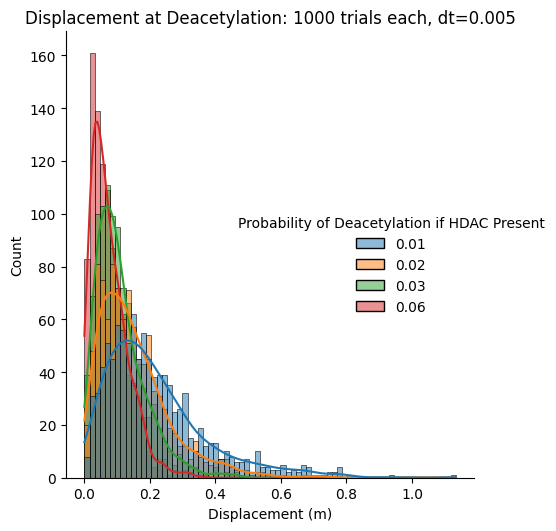

In [10]:
displacements = [output[0] for output in outputs]
g = sns.displot(displacements, kde=True)
plt.title(f"Displacement at Deacetylation: {trials} trials each, dt={dt}")
g._legend.set_title("Probability of Deacetylation if HDAC Present")
for t in g._legend.texts:
    t.set_text(f"{P_deacetylation_per_step[int(t.get_text())]:0.2f}")
plt.xlabel("Displacement (m)")

Text(0.5, 9.444444444444438, 'Time (s)')

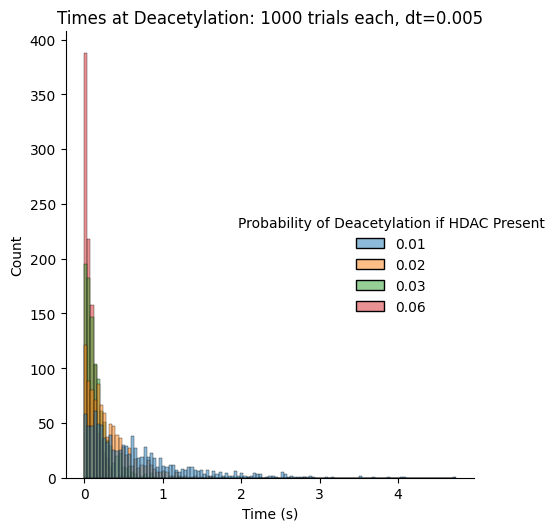

In [11]:
times = [output[1] for output in outputs]
g = sns.displot(times)
plt.title(f"Times at Deacetylation: {trials} trials each, dt={dt}")
g._legend.set_title("Probability of Deacetylation if HDAC Present")
for t in g._legend.texts:
    t.set_text(f"{P_deacetylation_per_step[int(t.get_text())]:0.2f}")
plt.xlabel("Time (s)")